# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

In [4]:
print("Beginning Data Retrieval")
print("------------------------")
    
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 : kapaa
Processing Record 2 of Set 1 : jamestown
Processing Record 3 of Set 1 : la ronge
Processing Record 4 of Set 1 : aklavik
Processing Record 5 of Set 1 : albany
Processing Record 6 of Set 1 : georgetown
Processing Record 7 of Set 1 : miri
Processing Record 8 of Set 1 : tiksi
Processing Record 9 of Set 1 : asau
Processing Record 10 of Set 1 : namibe
Processing Record 11 of Set 1 : rikitea
Processing Record 12 of Set 1 : maniitsoq
Processing Record 13 of Set 1 : nikolskoye
Processing Record 14 of Set 1 : gloversville
Processing Record 15 of Set 1 : hobart
Processing Record 16 of Set 1 : san patricio
Processing Record 17 of Set 1 : de aar
Processing Record 18 of Set 1 : bredasdorp
Processing Record 19 of Set 1 : carnarvon
Processing Record 20 of Set 1 : port alfred
Processing Record 21 of Set 1 : borgarnes
Processing Record 22 of Set 1 : mount gambier
Processing Record 23 of Set 1 : lagoa
Processing Record

Processing Record 35 of Set 4 : baishishan
Processing Record 36 of Set 4 : haines junction
Processing Record 37 of Set 4 : broome
Processing Record 38 of Set 4 : passo fundo
Processing Record 39 of Set 4 : praia da vitoria
City not found. Skipping...
Processing Record 40 of Set 4 : leningradskiy
Processing Record 41 of Set 4 : myitkyina
Processing Record 42 of Set 4 : nouakchott
Processing Record 43 of Set 4 : aiken
Processing Record 44 of Set 4 : sinnamary
Processing Record 45 of Set 4 : half moon bay
Processing Record 46 of Set 4 : vaini
Processing Record 47 of Set 4 : zambezi
Processing Record 48 of Set 4 : troitsko-pechorsk
Processing Record 49 of Set 4 : nome
Processing Record 50 of Set 4 : watertown
Processing Record 0 of Set 5 : teknaf
Processing Record 1 of Set 5 : guerrero negro
Processing Record 2 of Set 5 : angoche
Processing Record 3 of Set 5 : tignere
Processing Record 4 of Set 5 : mount pleasant
Processing Record 5 of Set 5 : odweyne
Processing Record 6 of Set 5 : henties

Processing Record 19 of Set 8 : rostovka
Processing Record 20 of Set 8 : olafsvik
Processing Record 21 of Set 8 : boffa
Processing Record 22 of Set 8 : semirom
Processing Record 23 of Set 8 : kosice
Processing Record 24 of Set 8 : luba
Processing Record 25 of Set 8 : pisco
Processing Record 26 of Set 8 : kovdor
Processing Record 27 of Set 8 : chirnogeni
Processing Record 28 of Set 8 : klaksvik
Processing Record 29 of Set 8 : palmares do sul
City not found. Skipping...
Processing Record 30 of Set 8 : gurlan
Processing Record 31 of Set 8 : san rafael
Processing Record 32 of Set 8 : charleston
Processing Record 33 of Set 8 : burns lake
Processing Record 34 of Set 8 : manacapuru
Processing Record 35 of Set 8 : atambua
Processing Record 36 of Set 8 : clyde river
Processing Record 37 of Set 8 : belogorsk
Processing Record 38 of Set 8 : matara
Processing Record 39 of Set 8 : severo-kurilsk
Processing Record 40 of Set 8 : cravo norte
Processing Record 41 of Set 8 : carcassonne
Processing Recor

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({"City": city_name,
                          "Cloudiness": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity":humidity,
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": max_temp,
                          "Wind Speed": wind_speed})

weather_df.to_csv("../output_data/city.csv", index= False)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,75,US,1619562042,69,22.0752,-159.3190,79.0,10.36
1,Jamestown,1,US,1619561762,43,42.0970,-79.2353,73.4,9.22
2,La Ronge,90,CA,1619561985,31,55.1001,-105.2842,26.6,11.50
3,Aklavik,0,CA,1619562043,37,68.2191,-135.0107,28.4,5.75
4,Albany,95,US,1619561993,22,42.6001,-73.9662,66.0,1.36


In [8]:
weather_df.sort_values("Humidity",ascending=False)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
132,Bambous Virieux,75,MU,1619562088,100,-20.3428,57.7575,75.99,10.36
318,Don Sak,20,TH,1619562154,100,9.3168,99.6918,79.00,5.35
287,Dangtu,2,CN,1619562144,100,31.5723,118.4928,53.60,3.31
341,Souillac,75,MU,1619562016,100,-20.5167,57.5167,75.20,10.36
130,Grindavik,75,IS,1619562088,100,63.8424,-22.4338,42.80,5.75
...,...,...,...,...,...,...,...,...,...
430,Gouré,16,NE,1619562194,10,13.9835,10.2704,85.41,10.96
64,Saraipali,2,IN,1619562064,9,21.3333,83.0000,82.06,1.05
338,Biltine,2,TD,1619562161,9,14.5333,20.9167,84.63,8.81
76,Tessalit,28,ML,1619562069,9,20.1986,1.0114,92.28,5.61


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,519.000000,5.190000e+02,519.000000,519.000000,519.000000,519.000000,519.000000
mean,55.250482,1.619562e+09,70.495183,18.971764,13.626005,61.603276,7.177283
std,38.281104,1.052356e+02,22.007534,33.653974,91.771393,19.354690,4.485979
min,0.000000,1.619561e+09,8.000000,-54.800000,-179.166700,4.660000,0.070000
25%,20.000000,1.619562e+09,60.500000,-8.969400,-66.874000,47.990000,3.570000
50%,68.000000,1.619562e+09,77.000000,21.426700,19.234500,64.400000,6.060000
75%,91.000000,1.619562e+09,87.000000,47.360950,91.262950,77.620000,9.955000
max,100.000000,1.619562e+09,100.000000,78.218600,179.316700,107.820000,24.400000


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df[(weather_df.Humidity<94) & (weather_df.Humidity>46)].copy()
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,75,US,1619562042,69,22.0752,-159.3190,79.00,10.36
5,George Town,20,MY,1619562044,89,5.4112,100.3354,81.00,2.04
7,Tiksi,55,RU,1619562045,92,71.6872,128.8694,4.66,6.91
8,Asău,90,RO,1619562045,87,46.4333,26.4000,41.00,2.30
9,Mossamedes,14,AO,1619562046,68,-15.1961,12.1522,75.49,8.16


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

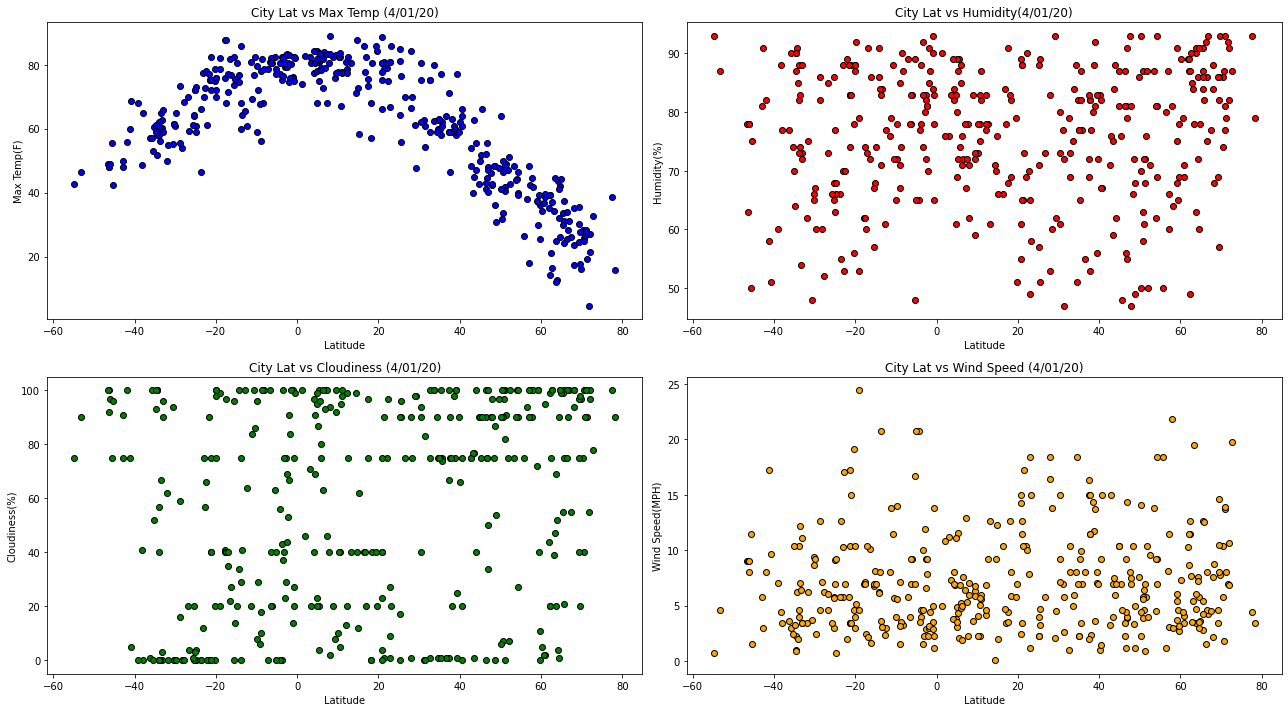

In [12]:
fig=plt.figure(figsize=(18,10))

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.scatter(clean_city_data.Lat, clean_city_data["Max Temp"],facecolor="blue",edgecolor="black")
ax1.set_title("City Lat vs Max Temp (4/01/20)")
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temp(F)")

ax2.scatter(clean_city_data.Lat, clean_city_data["Humidity"],facecolor="red",edgecolor="black")
ax2.set_title("City Lat vs Humidity(4/01/20)")
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity(%)")

ax3.scatter(clean_city_data.Lat, clean_city_data["Cloudiness"],facecolor="green",edgecolor="black")
ax3.set_title("City Lat vs Cloudiness (4/01/20)")
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness(%)")

ax4.scatter(clean_city_data.Lat, clean_city_data["Wind Speed"],facecolor="orange",edgecolor="black")
ax4.set_title("City Lat vs Wind Speed (4/01/20)")
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Wind Speed(MPH)")

plt.tight_layout()
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [16]:
north= clean_city_data[clean_city_data.Lat>=0] 
south= clean_city_data[clean_city_data.Lat<0] 

In [19]:
def LinReg_scatter(x,y):
    print('The r^2 is : {}'.format(round(stats.pearsonr(x,y)[0],2)))
    slope, intercept, r_value, p_value, std_error = stats.linregress(x,y)
    regress_vals = x * slope + intercept
    line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x, regress_vals, 'r-')
    print(line)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r^2 is : -0.92
y = -0.94x + 91.32


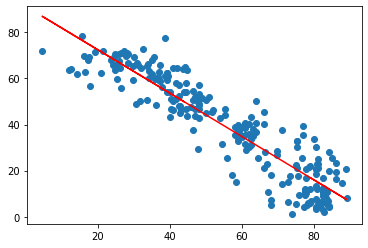

In [20]:
LinReg_scatter(north["Max Temp"],north.Lat)
#plt.title
#plt.xlabel
#plt.ylabel
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r^2 is : 0.8
y = 0.97x + -87.9


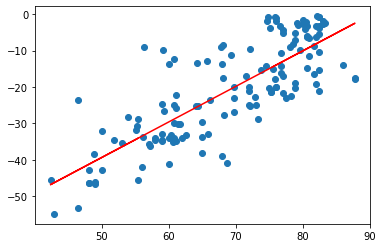

In [21]:
LinReg_scatter(south["Max Temp"],south.Lat)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r^2 is : 0.13
y = 0.25x + 20.22


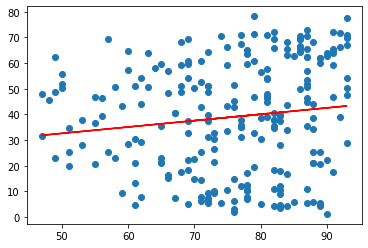

In [24]:
LinReg_scatter(north["Humidity"],north.Lat)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r^2 is : 0.14
y = 0.17x + -33.56


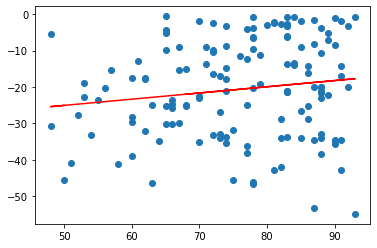

In [25]:
LinReg_scatter(south["Humidity"],south.Lat)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r^2 is : 0.18
y = 0.11x + 32.1


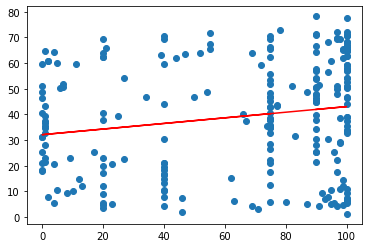

In [27]:
LinReg_scatter(north["Cloudiness"],north.Lat)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r^2 is : -0.03
y = -0.01x + -20.06


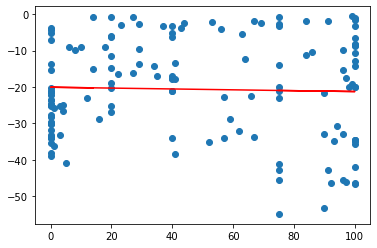

In [28]:
LinReg_scatter(south["Cloudiness"],south.Lat)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r^2 is : 0.06
y = 0.29x + 36.92


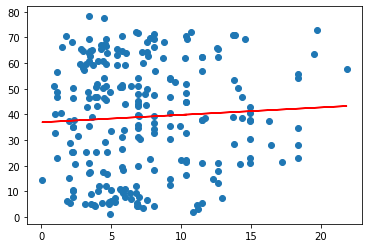

In [29]:
LinReg_scatter(north["Wind Speed"],north.Lat)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r^2 is : 0.04
y = 0.11x + -21.38


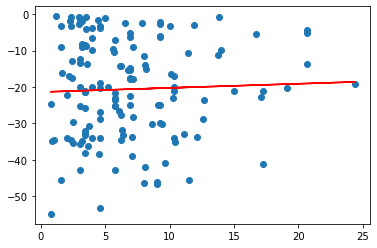

In [30]:
LinReg_scatter(south["Wind Speed"],south.Lat)
plt.show()